In [1]:
from osgeo import gdal
gdal.UseExceptions()
from matplotlib import pyplot as plt
import boto3
import os
from get_S3_resource import get_s3_resource
from s3_upload import upload_file_to_s3
from split_image import split_image
from s3_download import download_file_from_s3


In [2]:
session, s3_client = get_s3_resource()

In [3]:
# Use the session to get the resource
s3 = session.resource('s3')
bucket = s3.Bucket('digpath-data')
paths = []

for idx, x in enumerate(bucket.objects.all()):
    if 'Standard' in x.key:
        paths.append((x.key, x.size*(9.3132*(10**-10))))

paths.sort(key=lambda x: x[1])


prefix = '/vsis3/digpath-data/'

In [4]:
# print(paths)

Size for 84046T_001 is 128052 x 99668 x 3
RGB Values: 
Red mean: 198.84346771240234
Green mean: 205.41991806030273
Blue mean: 207.71808242797852
RGB Values: 
Red mean: 206.18324279785156
Green mean: 213.29705047607422
Blue mean: 215.8366928100586
RGB Values: 
Red mean: 196.3039436340332
Green mean: 203.32035446166992
Blue mean: 205.90056610107422
RGB Values: 
Red mean: 203.95912551879883
Green mean: 211.17718887329102
Blue mean: 213.91039276123047
RGB Values: 
Red mean: 201.00336837768555
Green mean: 208.05259323120117
Blue mean: 210.71107864379883
RGB Values: 
Red mean: 194.7684783935547
Green mean: 201.5034637451172
Blue mean: 203.92094802856445
RGB Values: 
Red mean: 194.47845840454102
Green mean: 201.080078125
Blue mean: 203.31470489501953
RGB Values: 
Red mean: 196.72222518920898
Green mean: 203.68457412719727
Blue mean: 206.3331756591797
RGB Values: 
Red mean: 197.99103927612305
Green mean: 204.88299179077148
Blue mean: 207.75926971435547
RGB Values: 
Red mean: 183.65711975097656

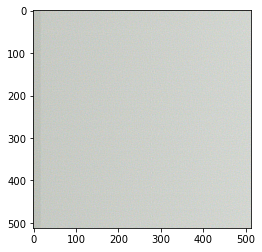

In [5]:
# TODO: create a text file, copy and paste folder name in there and then put if statement if name is not in text file, then go ahead and preprocess
# pickle database to read array directly and save it directly - for massive data let it go
# text file is easier

for path, size in paths:
    # if(size > 4.2):
    if(size < 5.79):
        continue

    elif(size > 5.81):
        break
    
    # open dataset
    ds = gdal.Open(prefix + path)
    fn = os.path.splitext(os.path.basename(path))[0]
    
    if not ds:
        print(f"gdal failed to open {prefix}{path}")
        continue

    print(f"Size for {fn} is {ds.RasterXSize} x {ds.RasterYSize} x {ds.RasterCount}")
    split_image(ds, fn)
    # closing the dataset, is implicit by the dataset going out of scope
    ds = None


In [3]:
# Upload locally stored preprocessed images to s3 bucket
local_images = 'local_images'
for folder in os.listdir(local_images):
    for file in os.listdir(f'{local_images}/{folder}'):
        upload_file_to_s3(f'{folder}/{file}')

84278T_002/84278T_002_17920_35328.png uploaded successfully
84278T_002/84278T_002_19456_26112.png uploaded successfully
84278T_002/84278T_002_19456_26624.png uploaded successfully
84278T_002/84278T_002_19456_27136.png uploaded successfully
84278T_002/84278T_002_19456_27648.png uploaded successfully
84278T_002/84278T_002_19456_28160.png uploaded successfully
84278T_002/84278T_002_19456_28672.png uploaded successfully
84278T_002/84278T_002_19456_32256.png uploaded successfully
84278T_002/84278T_002_19968_26624.png uploaded successfully
84278T_002/84278T_002_19968_27136.png uploaded successfully
84278T_002/84278T_002_19968_27648.png uploaded successfully
84278T_002/84278T_002_19968_28160.png uploaded successfully
84278T_002/84278T_002_19968_28672.png uploaded successfully
84278T_002/84278T_002_19968_29184.png uploaded successfully
84278T_002/84278T_002_19968_29696.png uploaded successfully
84278T_002/84278T_002_19968_30208.png uploaded successfully
84278T_002/84278T_002_19968_30720.png up

In [7]:
download_file_from_s3("84278T_001", bucket)
